In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## activation functoin

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

intput_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
    download=False
)

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [18]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size=intput_size, hidden_size=hidden_size, num_classes=num_classes)

# loss
criterion = nn.CrossEntropyLoss() # softmax
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28 * 28).to(device)
    lables = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, lables)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
      print('epoch: ', i, 'loss: ', loss.item())

# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for images, labels in test_loader:
    images = images.reshape(-1, 28 * 28).to(device)
    lables = labels.to(device)
    outputs = model(images)

    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == lables).sum().item()

acc = 100.0 * n_correct / n_samples
print('acc: ', acc)

epoch:  0 loss:  2.294520854949951
epoch:  100 loss:  0.4802093505859375
epoch:  200 loss:  0.25387993454933167
epoch:  300 loss:  0.2973117530345917
epoch:  400 loss:  0.25247254967689514
epoch:  500 loss:  0.25033220648765564
epoch:  0 loss:  0.16980062425136566
epoch:  100 loss:  0.31858810782432556
epoch:  200 loss:  0.14752089977264404
epoch:  300 loss:  0.13653746247291565
epoch:  400 loss:  0.19526295363903046
epoch:  500 loss:  0.2398182898759842
acc:  95.28


tensor(4)
prediction:  4


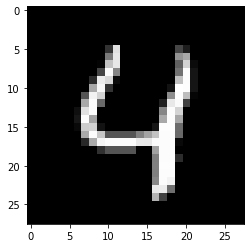

In [64]:
dataiter = iter(test_loader)
(img, lable) = next(dataiter)

test_case = 4

print(lable[test_case])
plt.imshow(img[test_case][0], cmap='gray')

img = img.reshape(-1, 28 * 28).to(device)

output = model(img[test_case])
max = -100
res = 0
for a in range(len(output)):
  if output[a] > max:
    res = a
    max = output[a]
print('prediction: ', res)